In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib

In [7]:
df=pd.read_csv('Housing.csv')

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
#No missing values in dataset

df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: ylabel='parking'>

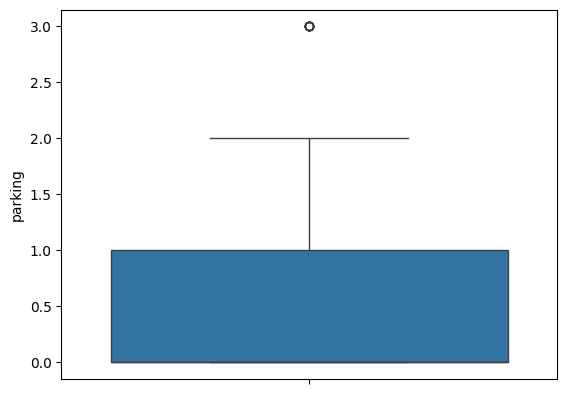

In [11]:
#Outlier Analysis


sns.boxplot(df['parking'])

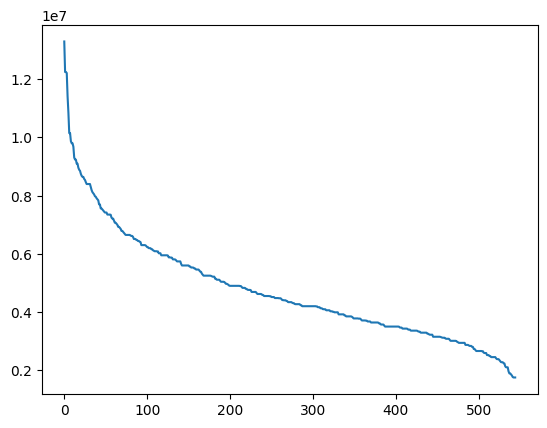

In [12]:
#outlier analysis 


y1=df['price']
plt.plot(y1)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df[['area', 'bedrooms', 'bathrooms', 'stories','stories','mainroad','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

df1 = pd.get_dummies(X)
df1


X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)



In [14]:
#prediction using sklearn
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 2.41786803e+02  7.31722016e+04  1.09499707e+06  2.09057744e+05
  2.09057744e+05  2.18638792e+05 -1.85752621e+05  1.85752621e+05
 -2.31760882e+05  2.31760882e+05 -3.39530155e+05  3.39530155e+05
 -4.01423072e+05  4.01423072e+05 -3.21244167e+05  3.21244167e+05
  1.81988272e+05  5.47196947e+04 -2.36707966e+05]
LR Intercept: 
 1530756.3139174017


In [16]:
print("Performance (R^2): ", lr.score(X_train, y_train))

Performance (R^2):  0.6839238404717944


In [17]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
answer = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", answer)


Mean Squared Error: 1778685072121.894


In [20]:
# Save the trained model to a file
joblib.dump(lr , 'trained_model.pkl')

['trained_model.pkl']

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
answer = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", answer)

Mean Squared Error: 2053784431374.883


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.5936777349461105
